In [38]:
import os
import matplotlib.pyplot as plt
import pandas as pd

current_directory = os.getcwd()
path = os.path.join(current_directory, 'data_records')
path = 'c:\\Users\\sebas\\Documents\\GitHub\\ClimAIte\\data_records'
os.chdir(path)
record = os.path.join(path, 'record_7')
print(os.listdir())

# df = pd.read_csv(record)

['record_extra30', 'record_previous_256', 'record_rndm_1', 'record_rndm_2', 'record_rndm_3', 'record_rndm_4', 'record_rndm_5', 'record_run2', 'record_run3']


In [39]:
# Import libraries
import glob
import pandas as pd

# Get CSV files list from a folder
csv_files = glob.glob(path + "/*")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
big_df   = pd.concat(df_list, ignore_index=True)
df = big_df

In [40]:
df.sample(10)
df2 = df[ df['idf.WindowMaterial:SimpleGlazingSystem.PH_Window.UFactor'] < 1]#.sort_values('Fitness Score').head(8)
df2 = df2[ df2[ 'idf.ZoneInfiltration:DesignFlowRate.Infiltration_d1fbaf75.Flow_Rate_per_Exterior_Surface_Area'] < 0.00015]
df2.sort_values('Fitness Score')# df[ df['Fitness Score'] < 0.01].corr()
# df.plot.scatter(x = 'Unique Name', y = 'Fitness Score')
# df[ df['Fitness Score'] < 1].plot.scatter(x = 'Unique Name', y = 'Fitness Score')

,Unnamed: 0,Generation,Parent1,Parent2,Unique Name,Fitness Score,kWh result,idf.People.People_5a9ee43c.People_per_Floor_Area,idf.ElectricEquipment.Equipment_d01c6929.Watts_per_Zone_Floor_Area,idf.ZoneInfiltration:DesignFlowRate.Infiltration_d1fbaf75.Flow_Rate_per_Exterior_Surface_Area,idf.WindowMaterial:SimpleGlazingSystem.PH_Window.UFactor,idf.WindowMaterial:SimpleGlazingSystem.PH_Window.Solar_Heat_Gain_Coefficient,idf.Material:NoMass.Typical Insulation-R50.Thermal_Resistance,idf.Material.Generic Gypsum Board.Specific_Heat,idf.ZoneHVAC:IdealLoadsAirSystem.Z1_Ground_Floor_48970ba6 Ideal Loads Air System.Sensible_Heat_Recovery_Effectiveness
1695,33,1,0-3,0-18,1-1,0.0000,18.233328,0.493,10.4,0.000080,0.80,0.17,5.1,5100,0.16
376,90,2,1-13,1-3,2-26,0.0024,18.177773,0.185,9.8,0.000074,0.78,0.36,21.0,4050,0.80
482,196,6,5-12,5-24,6-4,0.0189,18.363884,0.476,4.5,0.000042,0.94,0.57,27.4,3450,0.27
2219,109,3,2-8,2-28,3-13,0.0264,18.388884,0.100,7.0,0.000020,0.70,0.40,11.0,2400,0.54
139,109,3,2-8,2-28,3-13,0.0264,18.388884,0.100,7.0,0.000020,0.70,0.40,11.0,2400,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,46,1,0-29,0-10,1-14,948.5612,49.024986,0.008,11.7,0.000008,0.60,0.32,22.2,8360,0.81
12,12,0,no parent,no parent,0-12,1410.7408,55.786095,0.170,12.0,0.000000,0.40,0.90,15.0,2400,0.80
2232,122,3,2-1,2-1,3-26,1755.9681,60.130539,0.100,14.0,0.000020,0.50,0.80,19.0,800,0.74
152,122,3,2-1,2-1,3-26,1755.9681,60.130539,0.100,14.0,0.000020,0.50,0.80,19.0,800,0.74


In [41]:
list(df.columns)

['Unnamed: 0',
 'Generation',
 'Parent1',
 'Parent2',
 'Unique Name',
 'Fitness Score',
 'kWh result',
 'idf.People.People_5a9ee43c.People_per_Floor_Area',
 'idf.ElectricEquipment.Equipment_d01c6929.Watts_per_Zone_Floor_Area',
 'idf.ZoneInfiltration:DesignFlowRate.Infiltration_d1fbaf75.Flow_Rate_per_Exterior_Surface_Area',
 'idf.WindowMaterial:SimpleGlazingSystem.PH_Window.UFactor',
 'idf.WindowMaterial:SimpleGlazingSystem.PH_Window.Solar_Heat_Gain_Coefficient',
 'idf.Material:NoMass.Typical Insulation-R50.Thermal_Resistance',
 'idf.Material.Generic Gypsum Board.Specific_Heat',
 'idf.ZoneHVAC:IdealLoadsAirSystem.Z1_Ground_Floor_48970ba6 Ideal Loads Air System.Sensible_Heat_Recovery_Effectiveness']

['idf.People.People_5a9ee43c.People_per_Floor_Area', 'idf.ElectricEquipment.Equipment_d01c6929.Watts_per_Zone_Floor_Area', 'idf.ZoneInfiltration:DesignFlowRate.Infiltration_d1fbaf75.Flow_Rate_per_Exterior_Surface_Area', 'idf.WindowMaterial:SimpleGlazingSystem.PH_Window.UFactor', 'idf.WindowMaterial:SimpleGlazingSystem.PH_Window.Solar_Heat_Gain_Coefficient', 'idf.Material:NoMass.Typical Insulation-R50.Thermal_Resistance', 'idf.Material.Generic Gypsum Board.Specific_Heat', 'idf.ZoneHVAC:IdealLoadsAirSystem.Z1_Ground_Floor_48970ba6 Ideal Loads Air System.Sensible_Heat_Recovery_Effectiveness']


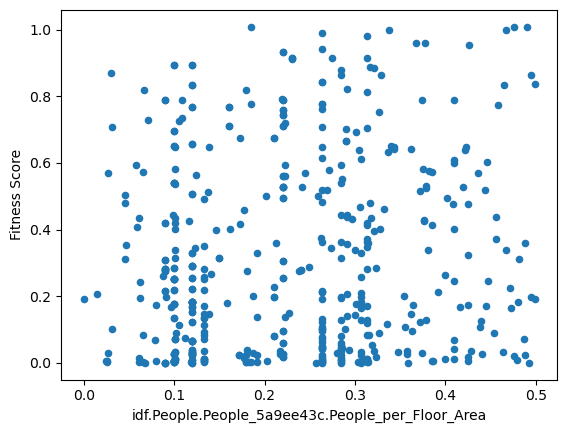

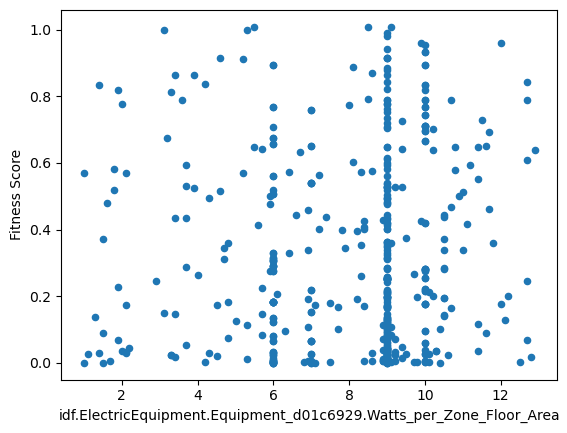

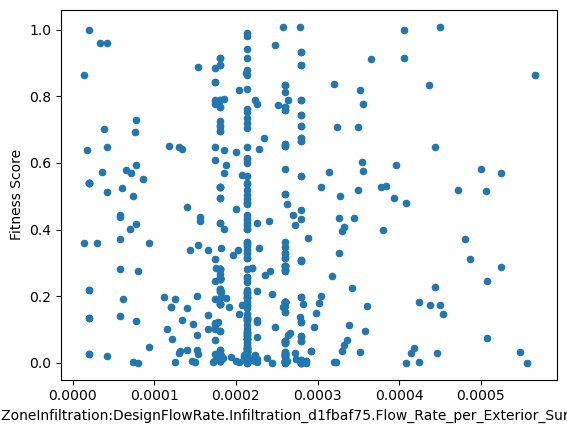

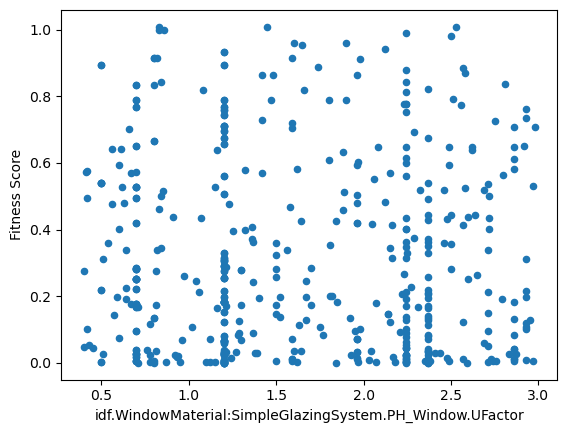

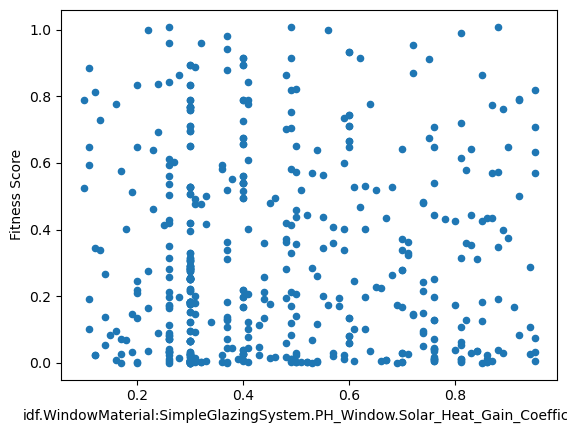

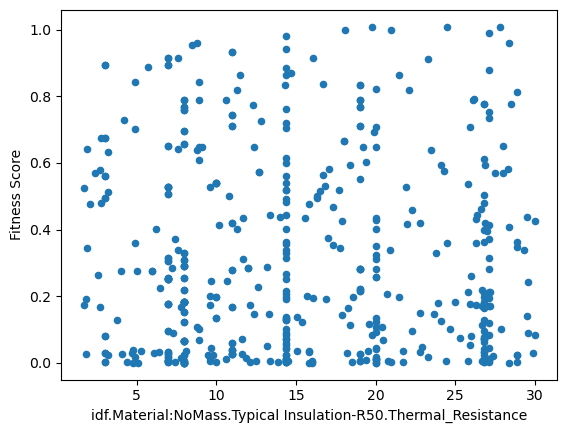

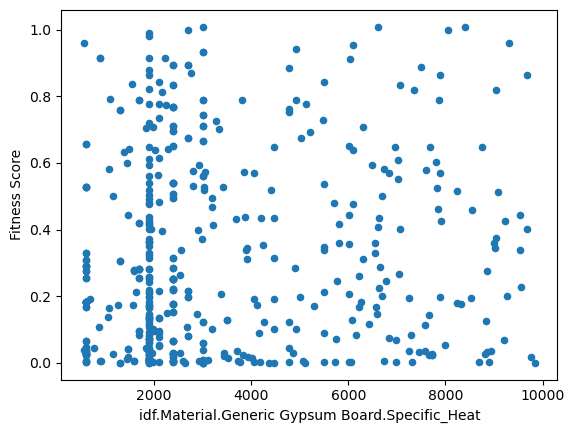

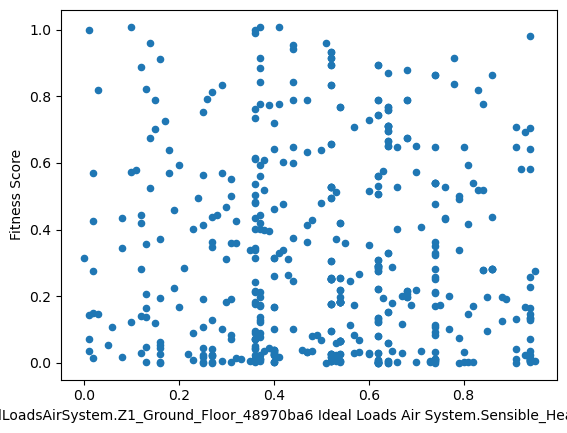

In [42]:
# note, lower fitness score is better

df_idf = df.filter(regex='idf', axis=1)
names = df_idf.columns.values.tolist()
print(names)
for i in names:
    df[ df['Fitness Score'] < 1.01].plot.scatter(x=i, y='Fitness Score')#.set_ylim(ymin=0, ymax=0.2)

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [44]:
df.corr(numeric_only=True)

,Unnamed: 0,Generation,Fitness Score,kWh result,idf.People.People_5a9ee43c.People_per_Floor_Area,idf.ElectricEquipment.Equipment_d01c6929.Watts_per_Zone_Floor_Area,idf.ZoneInfiltration:DesignFlowRate.Infiltration_d1fbaf75.Flow_Rate_per_Exterior_Surface_Area,idf.WindowMaterial:SimpleGlazingSystem.PH_Window.UFactor,idf.WindowMaterial:SimpleGlazingSystem.PH_Window.Solar_Heat_Gain_Coefficient,idf.Material:NoMass.Typical Insulation-R50.Thermal_Resistance,idf.Material.Generic Gypsum Board.Specific_Heat,idf.ZoneHVAC:IdealLoadsAirSystem.Z1_Ground_Floor_48970ba6 Ideal Loads Air System.Sensible_Heat_Recovery_Effectiveness
Unnamed: 0,1.000000,0.997285,-0.020915,0.034244,0.061188,0.018993,0.082089,0.220094,-0.022436,0.100161,-0.006301,-0.021223
Generation,0.997285,1.000000,-0.021530,0.034970,0.060840,0.018052,0.085190,0.220462,-0.021768,0.100604,-0.007118,-0.018969
Fitness Score,-0.020915,-0.021530,1.000000,0.701234,-0.135388,0.221786,0.102501,-0.009688,0.078440,-0.047035,0.016815,-0.060780
kWh result,0.034244,0.034970,0.701234,1.000000,-0.086860,0.522551,0.467733,0.120416,0.045174,-0.091538,0.042190,-0.109299
idf.People.People_5a9ee43c.People_per_Floor_Area,0.061188,0.060840,-0.135388,-0.086860,1.000000,0.033915,0.052544,0.129583,0.048496,0.065980,0.096665,-0.072190
idf.ElectricEquipment.Equipment_d01c6929.Watts_per_Zone_Floor_Area,0.018993,0.018052,0.221786,0.522551,0.033915,1.000000,-0.007718,0.011538,0.021175,0.038126,-0.004092,0.010593
idf.ZoneInfiltration:DesignFlowRate.Infiltration_d1fbaf75.Flow_Rate_per_Exterior_Surface_Area,0.082089,0.085190,0.102501,0.467733,0.052544,-0.007718,1.000000,0.135983,0.052294,0.018624,0.127428,-0.053623
idf.WindowMaterial:SimpleGlazingSystem.PH_Window.UFactor,0.220094,0.220462,-0.009688,0.120416,0.129583,0.011538,0.135983,1.000000,0.052779,0.157336,0.137476,-0.071987
idf.WindowMaterial:SimpleGlazingSystem.PH_Window.Solar_Heat_Gain_Coefficient,-0.022436,-0.021768,0.078440,0.045174,0.048496,0.021175,0.052294,0.052779,1.000000,0.050625,0.097557,-0.018426
idf.Material:NoMass.Typical Insulation-R50.Thermal_Resistance,0.100161,0.100604,-0.047035,-0.091538,0.065980,0.038126,0.018624,0.157336,0.050625,1.000000,0.048287,-0.048370


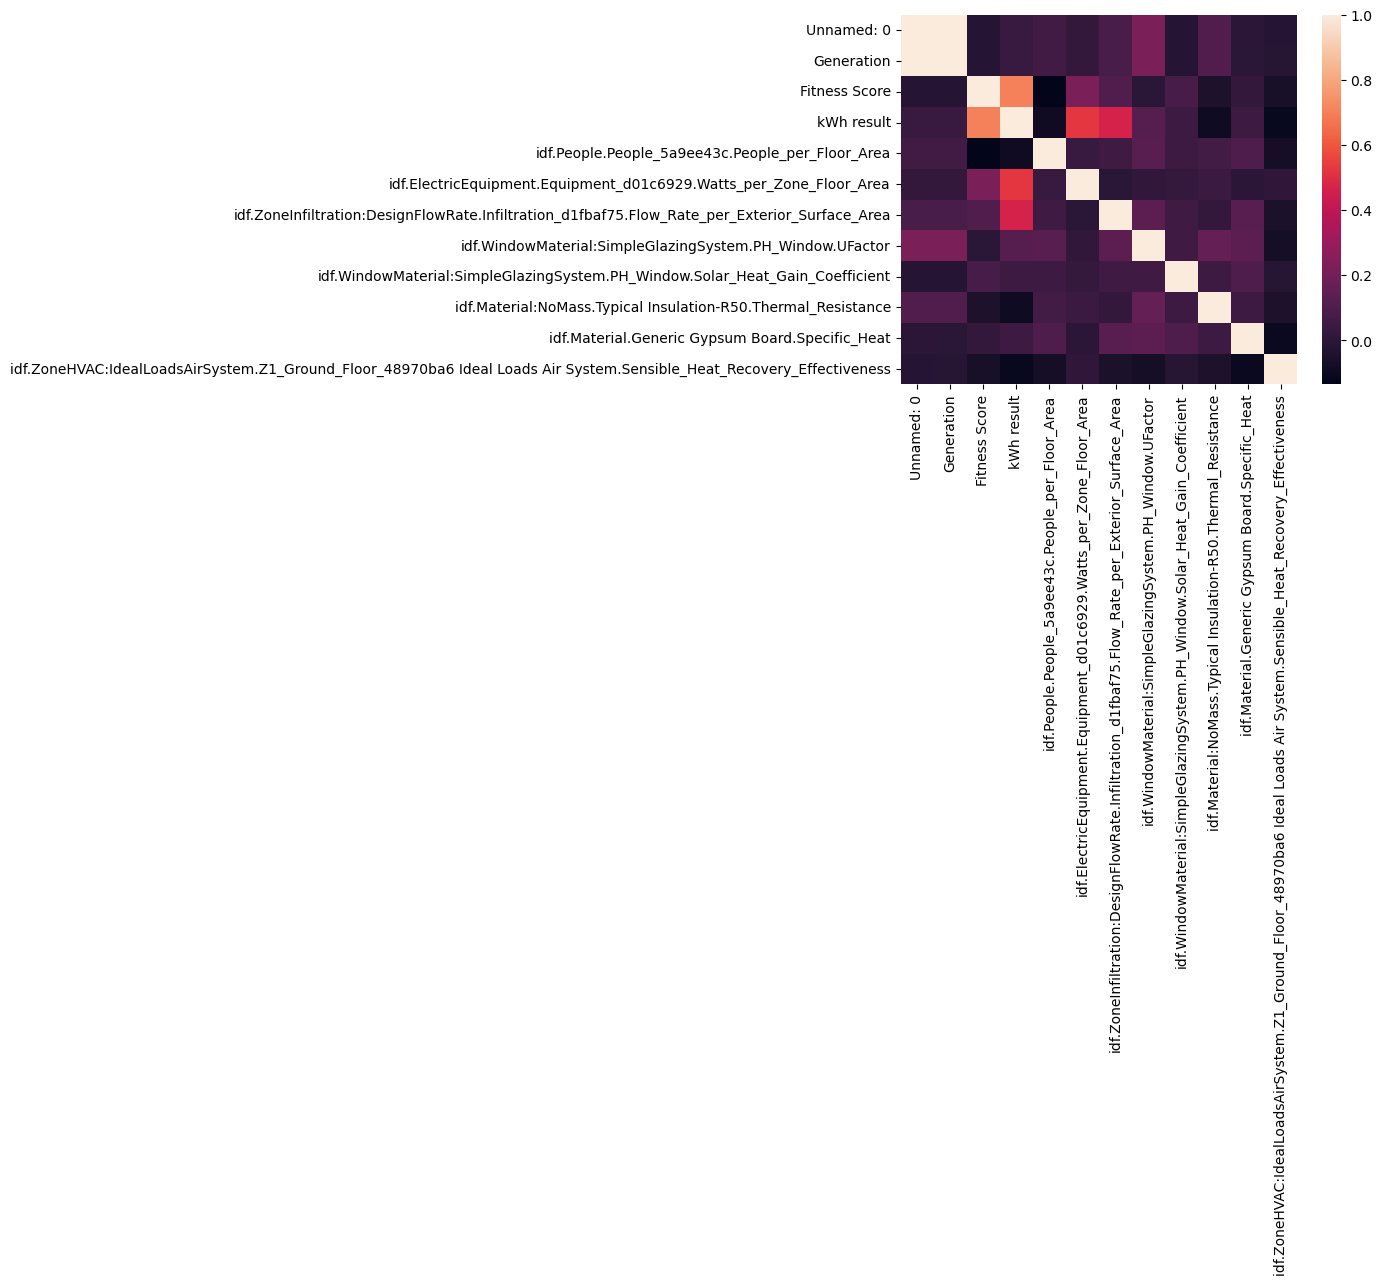

In [45]:
sns.heatmap(df.corr(numeric_only=True));

C:\Users\sebas\AppData\Local\Temp\ipykernel_13492\1693301019.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(dataframe.corr(), dtype=bool))
C:\Users\sebas\AppData\Local\Temp\ipykernel_13492\1693301019.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')


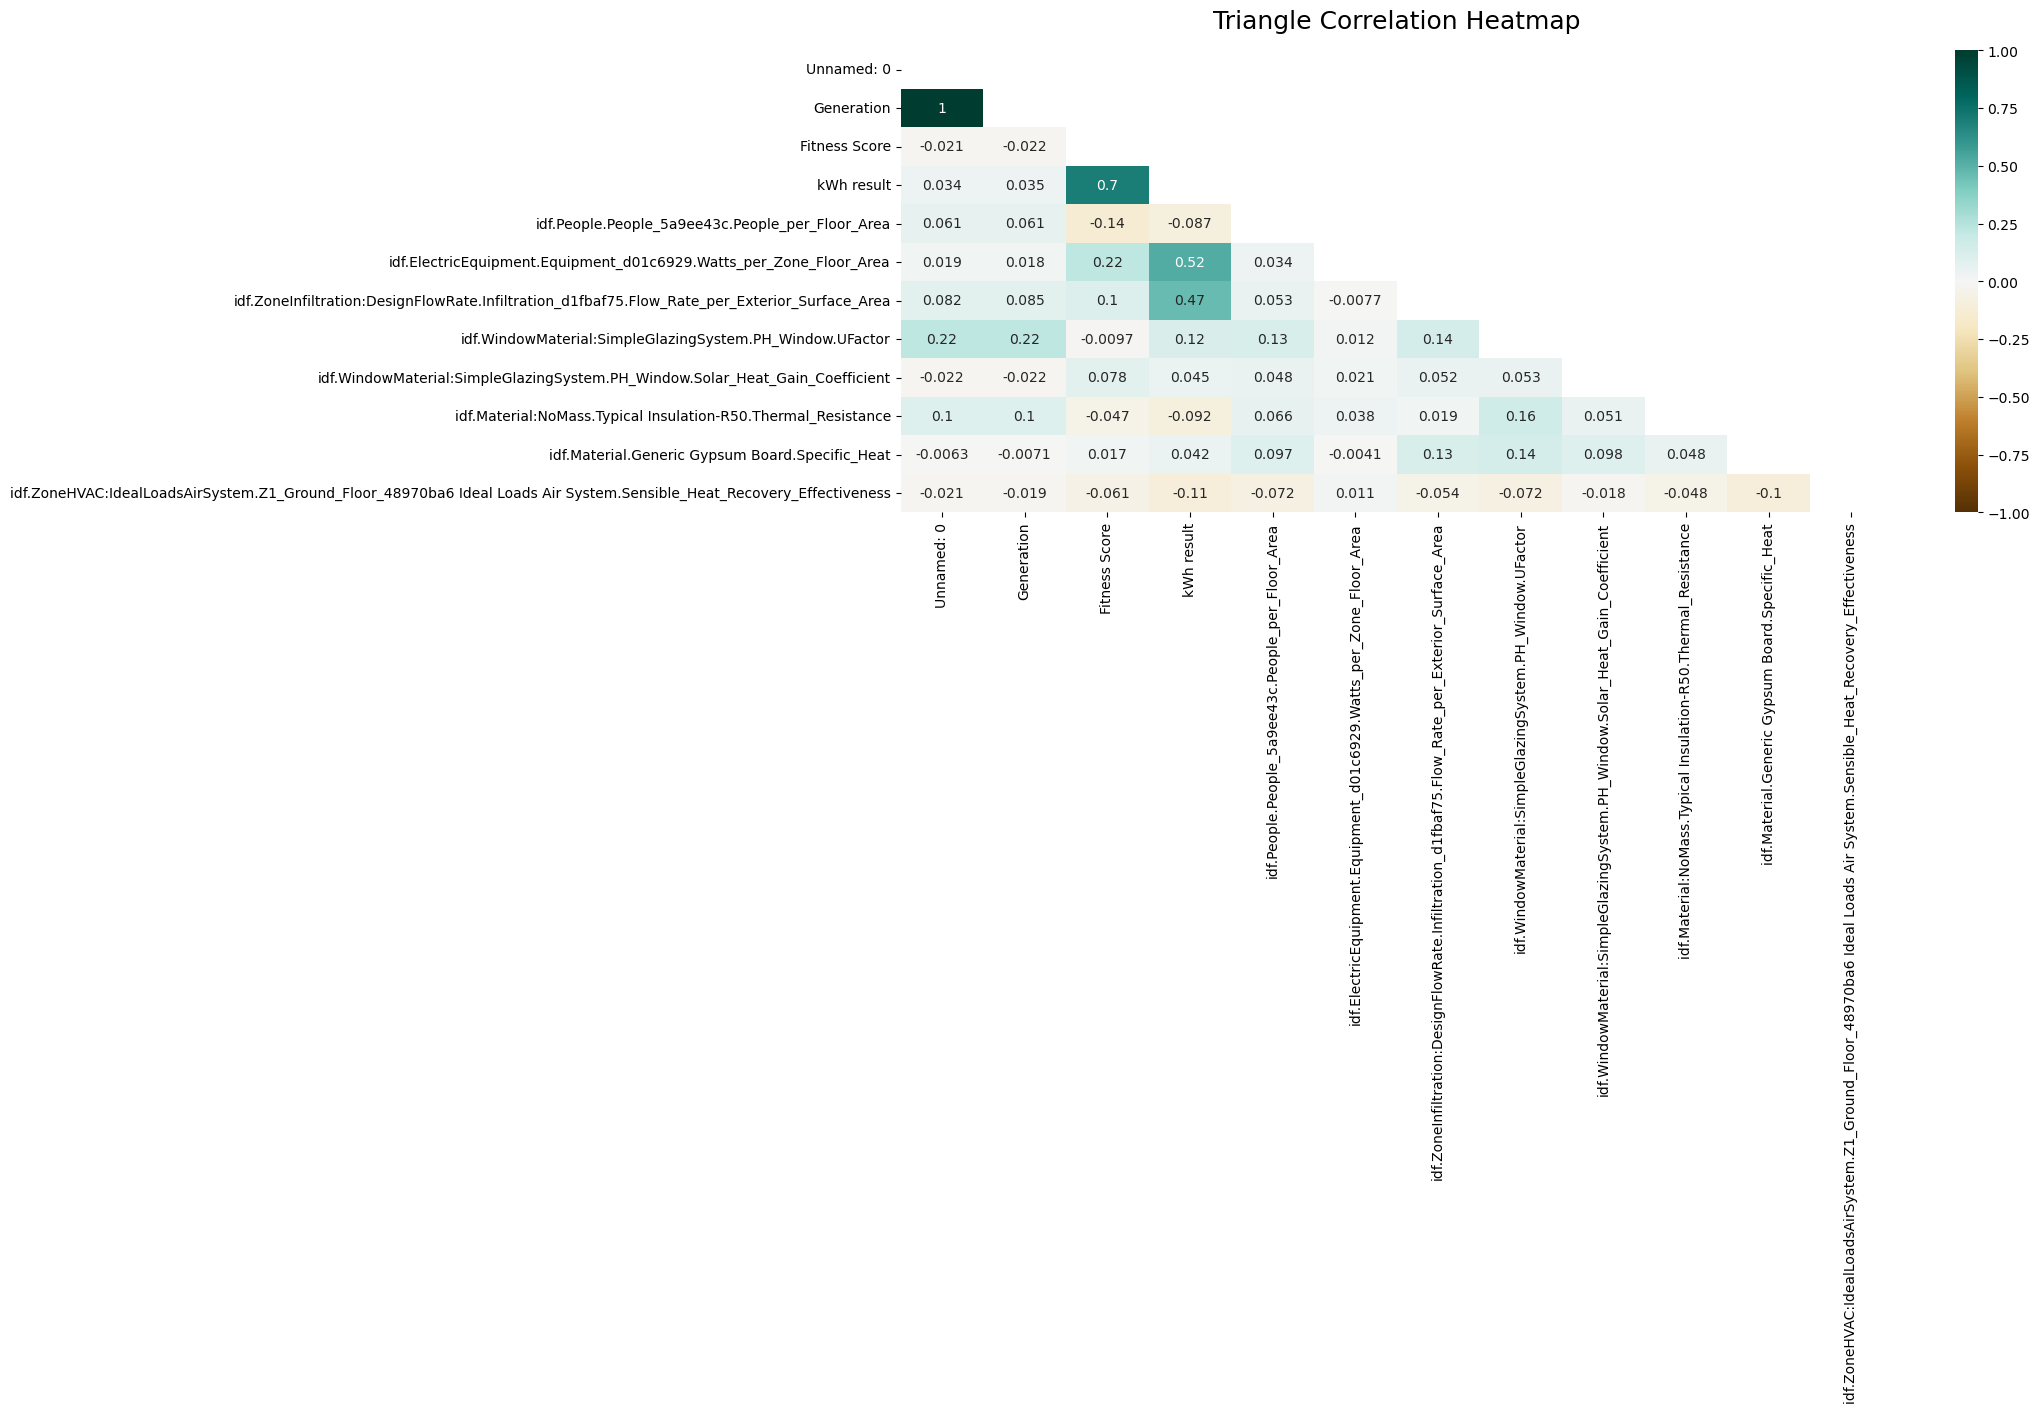

In [46]:
dataframe = df
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dataframe.corr(), dtype=bool))
heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

C:\Users\sebas\AppData\Local\Temp\ipykernel_13492\879294380.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.corr()[['Fitness Score']].sort_values(by='Fitness Score', ascending=False)
C:\Users\sebas\AppData\Local\Temp\ipykernel_13492\879294380.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(dataframe.corr()[['Fitness Score']].sort_values(by='Fitness Score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


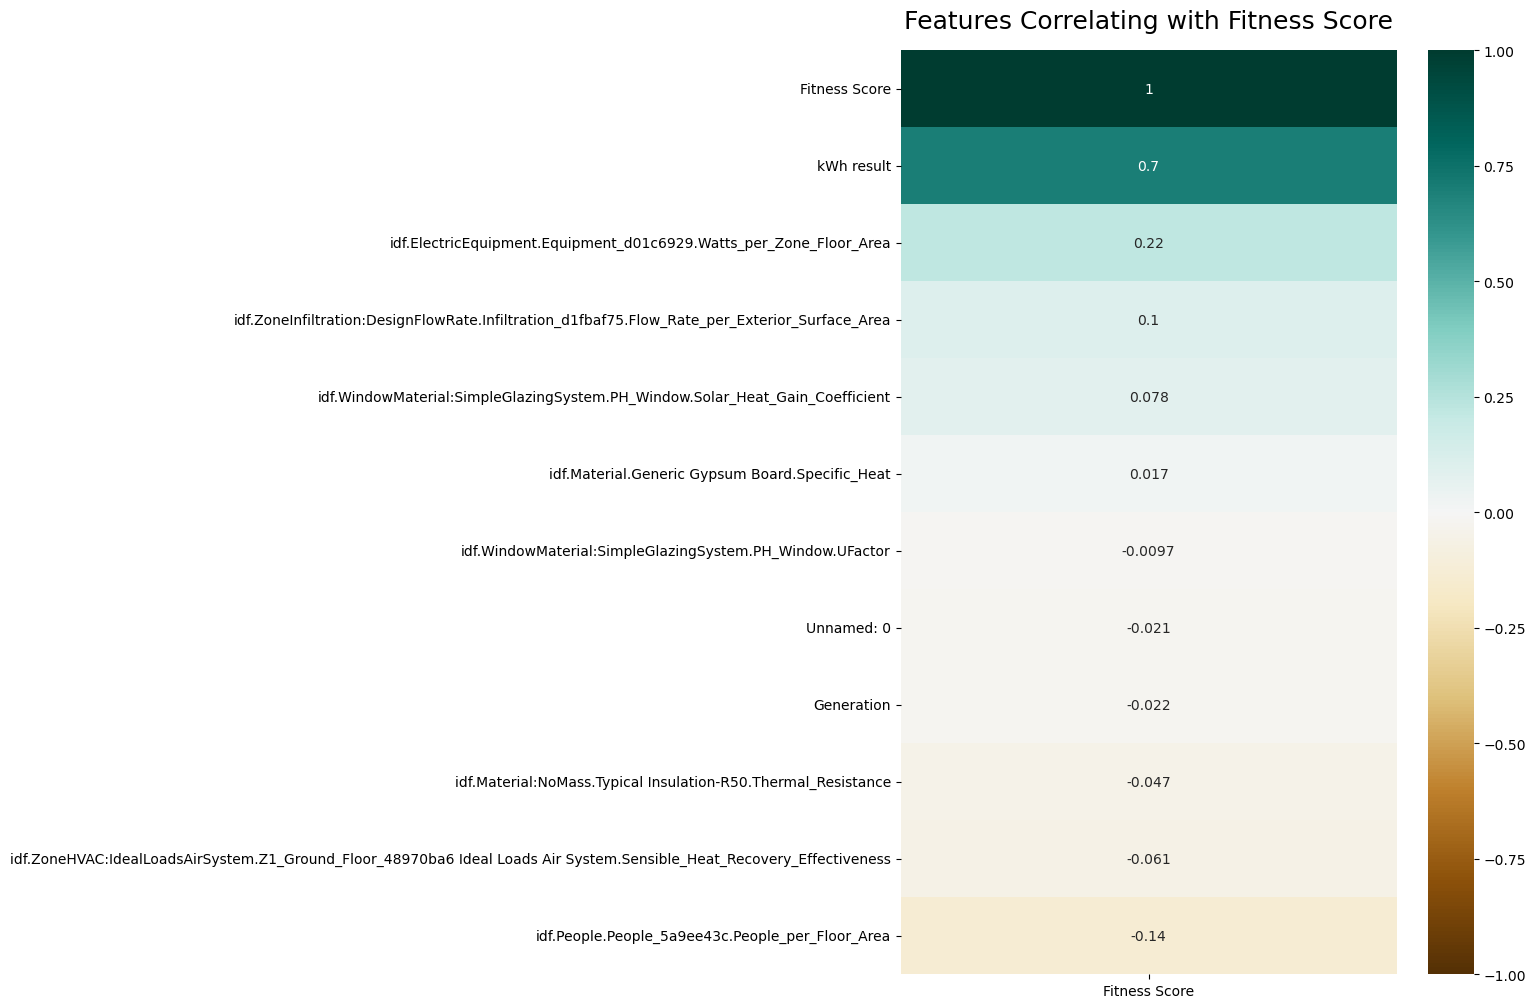

In [47]:
dataframe.corr()[['Fitness Score']].sort_values(by='Fitness Score', ascending=False)


plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dataframe.corr()[['Fitness Score']].sort_values(by='Fitness Score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Fitness Score', fontdict={'fontsize':18}, pad=16);

In [48]:
import math
# Also parallel plot with naming based on a column binning their values
df_binned = df[ df['kWh result'] <= 50]
# df['kwh bins'] = pd.cut(df['kWh result'], bins=50)
df_binned['kWh result'] = df_binned['kWh result'].apply(np.round)
df_binned.head()

C:\Users\sebas\AppData\Local\Temp\ipykernel_13492\3710262051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binned['kWh result'] = df_binned['kWh result'].apply(np.round)


,Unnamed: 0,Generation,Parent1,Parent2,Unique Name,Fitness Score,kWh result,idf.People.People_5a9ee43c.People_per_Floor_Area,idf.ElectricEquipment.Equipment_d01c6929.Watts_per_Zone_Floor_Area,idf.ZoneInfiltration:DesignFlowRate.Infiltration_d1fbaf75.Flow_Rate_per_Exterior_Surface_Area,idf.WindowMaterial:SimpleGlazingSystem.PH_Window.UFactor,idf.WindowMaterial:SimpleGlazingSystem.PH_Window.Solar_Heat_Gain_Coefficient,idf.Material:NoMass.Typical Insulation-R50.Thermal_Resistance,idf.Material.Generic Gypsum Board.Specific_Heat,idf.ZoneHVAC:IdealLoadsAirSystem.Z1_Ground_Floor_48970ba6 Ideal Loads Air System.Sensible_Heat_Recovery_Effectiveness
0,0,0,no parent,no parent,0-0,34.6613,12.0,0.07,3.0,0.00022,1.4,0.6,19.0,1100,0.60
1,1,0,no parent,no parent,0-1,0.2770,18.0,0.18,10.0,0.00008,0.4,0.3,4.0,1600,0.95
2,2,0,no parent,no parent,0-2,7.8329,21.0,0.18,11.0,0.00022,0.8,0.6,4.0,1700,0.95
3,3,0,no parent,no parent,0-3,219.9076,33.0,0.05,13.0,0.00012,1.0,0.3,9.0,600,0.40
4,4,0,no parent,no parent,0-4,7.0158,21.0,0.17,11.0,0.00028,0.8,0.9,11.0,1700,0.95


In [114]:
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

data = df.drop(['Unnamed: 0',
 'Generation',
 'Parent1',
 'Parent2', 'Unique Name', 'Fitness Score'], axis=1) #pandas.read_csv(r'C:\Python27\Lib\site-packages\pandas\tests\data\iris.csv', sep=',')
data = data[ data['kWh result'] < 20 ]
data = data[ data['kWh result'] > 16 ]
data['kWh result'] = data['kWh result'].apply(np.round)
normalized_df=(data-data.mean())/data.std()

data.sort_values('kWh result').head()

# parallel_coordinates(normalized_df, 'kWh result', color=[(0.5,0.5,x*1/10) for x in range(10)])
# plt.figure(figsize=(300,200))
# plt.show()

,kWh result,People per area,Watts per area,Infiltration rate per surface area,Window U-value,Window g-value,Wall thermal resistance,Thermal mass int walls,Heat recovery efficiency
1232,16.0,0.259,7.7,0.000300,1.71,0.68,16.8,4540,0.68
320,16.0,0.106,1.4,0.000298,2.24,0.84,13.5,9080,0.03
1030,16.0,0.283,2.5,0.000512,0.63,0.71,18.6,7110,0.73
300,16.0,0.265,5.0,0.000242,2.99,0.55,6.7,2330,0.76
2439,16.0,0.263,7.8,0.000214,1.25,0.59,8.1,2160,0.38


In [118]:
data_2 = data [ data['Infiltration rate per surface area'] < 0.0002 ]
data_2 = data_2 [ data_2['Window U-value'] < 0.7 ]
data_2 = data_2 [ data_2['Window g-value'] < 0.6 ]
data_2 = data_2 [ data_2['Window g-value'] > 0.4 ]
data_2 = data_2 [ data_2['Wall thermal resistance'] < 10 ]
data_2 = data_2 [ data_2['Wall thermal resistance'] > 6 ]
data_2.head()

,kWh result,People per area,Watts per area,Infiltration rate per surface area,Window U-value,Window g-value,Wall thermal resistance,Thermal mass int walls,Heat recovery efficiency
1631,20.0,0.395,11.8,0.00011,0.64,0.54,7.6,8930,0.19


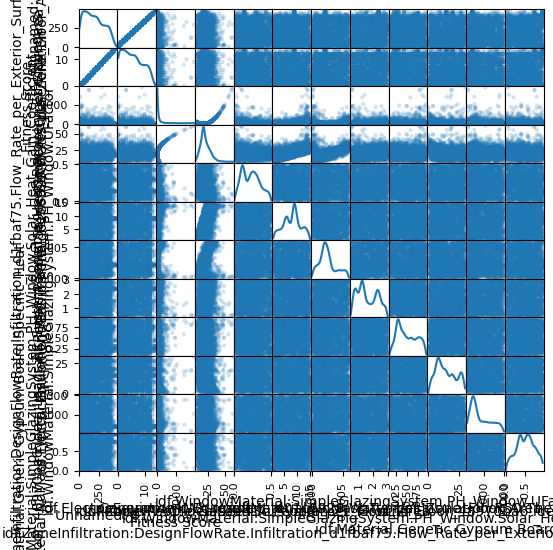

In [50]:
from pandas.plotting import scatter_matrix

# df = pd.DataFrame(np.random.randn(1000, 4), columns=["a", "b", "c", "d"])

scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal="kde");

In [67]:
dfplot = df
dfplot.rename(columns={
    'idf.People.People_5a9ee43c.People_per_Floor_Area': 'People per area',
    'idf.ElectricEquipment.Equipment_d01c6929.Watts_per_Zone_Floor_Area': 'Watts per area',
    'idf.ZoneInfiltration:DesignFlowRate.Infiltration_d1fbaf75.Flow_Rate_per_Exterior_Surface_Area': 'Infiltration rate per surface area',
    'idf.WindowMaterial:SimpleGlazingSystem.PH_Window.UFactor': 'Window U-value',
    'idf.WindowMaterial:SimpleGlazingSystem.PH_Window.Solar_Heat_Gain_Coefficient': 'Window g-value',
    'idf.Material:NoMass.Typical Insulation-R50.Thermal_Resistance': 'Wall thermal resistance',
    'idf.Material.Generic Gypsum Board.Specific_Heat': 'Thermal mass int walls',
    'idf.ZoneHVAC:IdealLoadsAirSystem.Z1_Ground_Floor_48970ba6 Ideal Loads Air System.Sensible_Heat_Recovery_Effectiveness': 'Heat recovery efficiency'}, inplace=True)
dfplot.head()
df1 = dfplot[['kWh result', 'People per area']]
df2 = dfplot[['kWh result', 'Watts per area']]
df3 = dfplot[['kWh result', 'Infiltration rate per surface area']]
df4 = dfplot[['kWh result', 'Window U-value']]
df5 = dfplot[['kWh result', 'Window g-value']]
df6 = dfplot[['kWh result', 'Wall thermal resistance']]
df7 = dfplot[['kWh result', 'Thermal mass int walls']]
df8 = dfplot[['kWh result', 'Heat recovery efficiency']]

<Axes: xlabel='Heat recovery efficiency', ylabel='kWh result'>

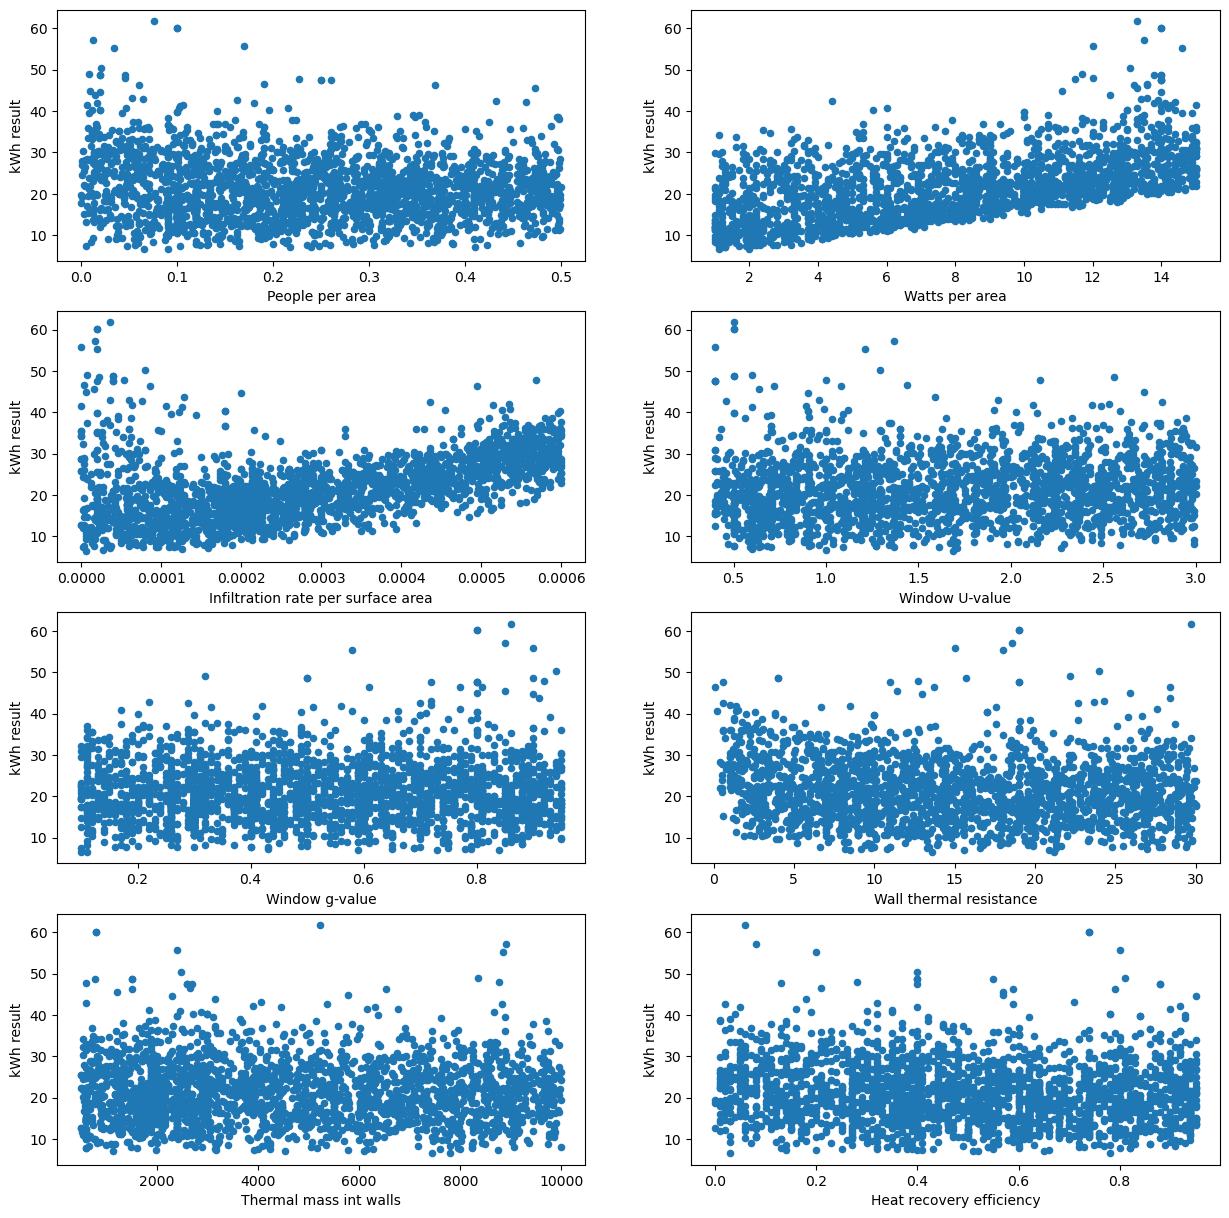

In [111]:
fig, axes = plt.subplots(nrows=4, ncols=2)
# fig(figsize=(20,20))
fig.set_figheight(15)
fig.set_figwidth(15)
#add DataFrames to subplots
df1.plot(ax=axes[0,0], kind='scatter', y='kWh result', x='People per area')
df2.plot(ax=axes[0,1], kind='scatter', y='kWh result', x='Watts per area')
df3.plot(ax=axes[1,0], kind='scatter', y='kWh result', x='Infiltration rate per surface area')
df4.plot(ax=axes[1,1], kind='scatter', y='kWh result', x='Window U-value')
df5.plot(ax=axes[2,0], kind='scatter', y='kWh result', x='Window g-value')
df6.plot(ax=axes[2,1], kind='scatter', y='kWh result', x='Wall thermal resistance')
df7.plot(ax=axes[3,0], kind='scatter', y='kWh result', x='Thermal mass int walls')
df8.plot(ax=axes[3,1], kind='scatter', y='kWh result', x='Heat recovery efficiency')

In [94]:
dfplot = dfplot.drop(['Unnamed: 0',
 'Generation',
 'Parent1',
 'Parent2', 'Unique Name', 'Fitness Score'], axis=1)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=8)
list_df = [df1,df2,df3,df4,df5,df6,df7,df8]
column_names = list(dfplot.columns)
column_names.pop(0)
print(column_names)
for i, name in enumerate(column_names):
    dfplot.plot(x=dfplot['kWh result'], y=dfplot.name, kind="scatter", ax=axes[i])

plt.show()

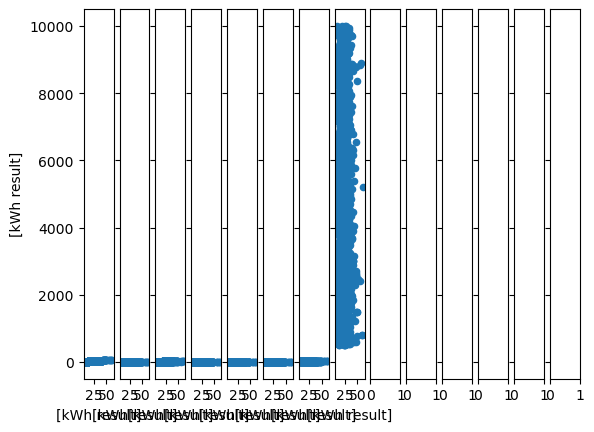

In [98]:
fig, axes = plt.subplots(1,len(df.columns.values)-1, sharey=True)

for i, col in enumerate(dfplot.columns.values[:-1]):
    df.plot(x=['kWh result'], y=[col], kind="scatter", ax=axes[i])

plt.show()